# Dijkstra's algorithm

In [6]:
def create_graph(edges):
    graph = {}
    for src, dst, wt in edges:
        if src not in graph:
            graph[src] = []
        graph[src].append((dst,wt))
    return graph

In [7]:
import networkx as nx, matplotlib.pyplot as plt, numpy as np

Undirected Graph:


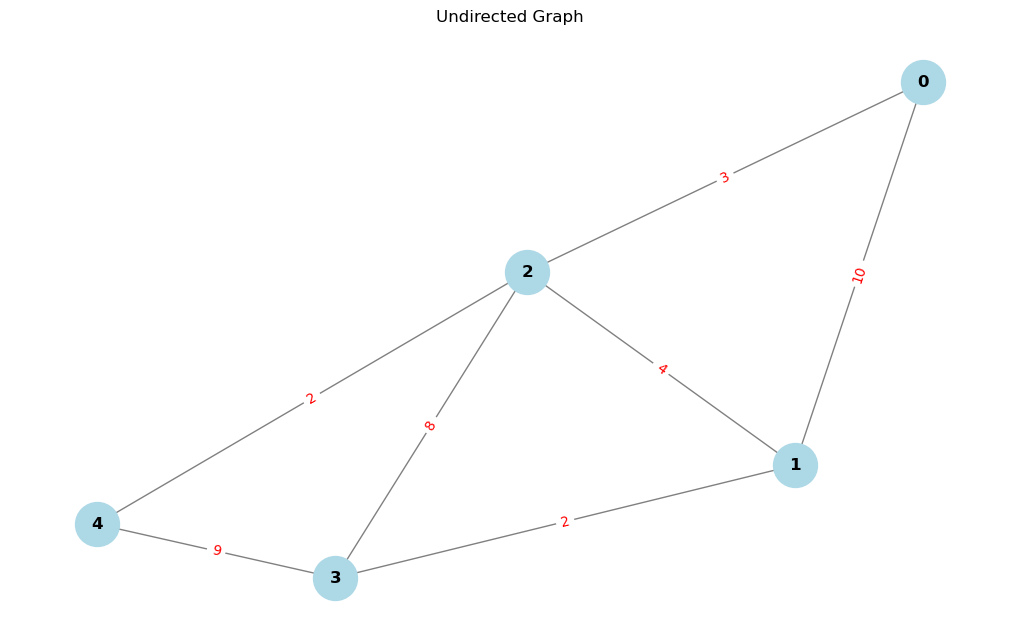

Directed Graph:


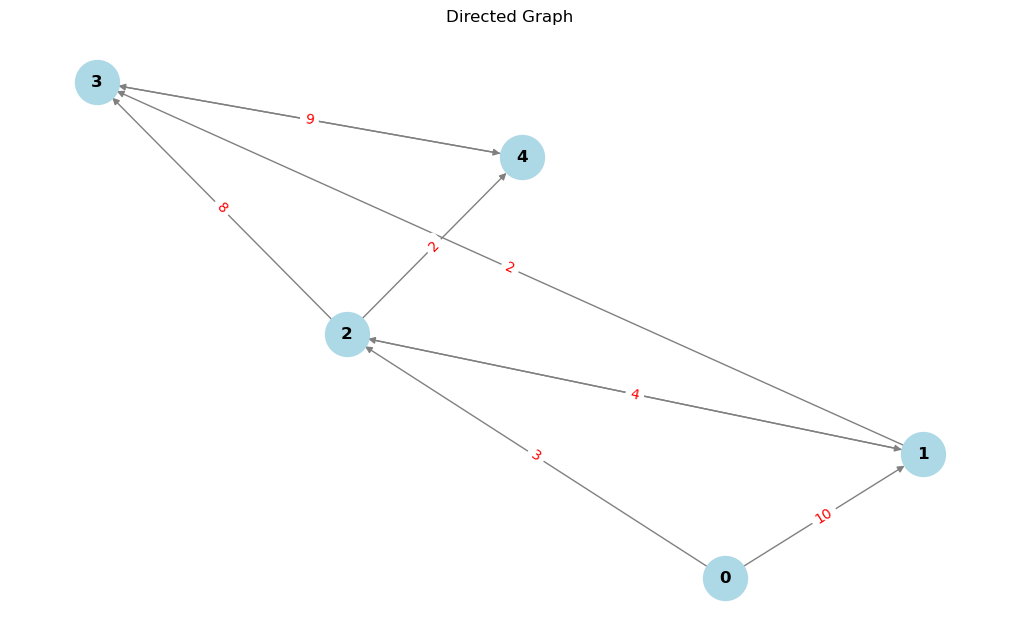

In [9]:
# Define the graph edges with weights
edges = [
    (0, 1, 10),
    (0, 2, 3),
    (1, 2, 1),
    (2, 1, 4),
    (1, 3, 2),
    (2, 3, 8),
    (2, 4, 2),
    (3, 4, 7),
    (4, 3, 9)
]

def draw_graph(edges, directed=False):
    # Create a directed or undirected graph based on the 'directed' flag
    G = nx.DiGraph() if directed else nx.Graph()
    
    # Add weighted edges to the graph
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)
        
    # Get positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

    # Draw nodes and edges
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color='gray')
    
    # Draw edge labels to display weights
    edge_labels = {(u, v): f'{w}' for u, v, w in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    title = "Directed Graph" if directed else "Undirected Graph"
    plt.title(title)
    plt.show()

# Draw undirected graph
print("Undirected Graph:")
draw_graph(edges, directed=False)

# Draw directed graph
print("Directed Graph:")
draw_graph(edges, directed=True)

In [10]:
def dijkstra(graph, start):
    distances = {vertex: float('inf') for vertex in range(max(graph.keys())+1)}
    distances[start] = 0
    visited = set()
    path = {vertex: [] for vertex in range(max(graph.keys())+1)}
    path[start] = [start]
    
    while len(visited) < len(distances):
        min_dist = float('inf')
        min_vertex = None
        # find edge with minimum distance
        for vertex in range(len(distances)):
            if vertex not in visited and distances[vertex] < min_dist:
                min_dist = distances[vertex]
                min_vertex = vertex
        
        if min_vertex is None:
            break
            
        visited.add(min_vertex)
        
        if min_vertex in graph:
            for neighbour, weight in graph[min_vertex]:
                distance = distances[min_vertex] + weight
                if distance < distances[neighbour]:
                    distances[neighbour] = distance
                    path[neighbour] = path[min_vertex] + [neighbour]
                
    return distances, path

The edge matrix scheme here is for a given graph represented by 
```python
[u, v, edge_weight(u,v)]
```

In [11]:
edges = [[0,1,10],[0,2,3],[1,2,1],[2,1,4],[1,3,2],[2,3,8],[2,4,2],[3,4,7],[4,3,9]]
graph1 = create_graph(edges)

In [12]:
graph1

{0: [(1, 10), (2, 3)],
 1: [(2, 1), (3, 2)],
 2: [(1, 4), (3, 8), (4, 2)],
 3: [(4, 7)],
 4: [(3, 9)]}

In [13]:
g1_dist, g1_path = dijkstra(graph1,0)
print(f"\nDijkstra Results:\nDistances: {g1_dist} \nShortest Path: {g1_path}")


Dijkstra Results:
Distances: {0: 0, 1: 7, 2: 3, 3: 9, 4: 5} 
Shortest Path: {0: [0], 1: [0, 2, 1], 2: [0, 2], 3: [0, 2, 1, 3], 4: [0, 2, 4]}
